### Setup

Import Caffe and the usual modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '../../'  # this file is expected to be in {caffe_root}/examples/siamese
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

### Load the trained net

Load the model definition and weights and set to CPU mode TEST phase computation with input scaling.

In [3]:
MODEL_FILE = 'mnist_siamese.prototxt'
# decrease if you want to preview during training
PRETRAINED_FILE = 'My_mnist_siamese_0to6_t89_feat_2_sim_iter_5000.caffemodel' 
caffe.set_mode_cpu()
net = caffe.Net(MODEL_FILE, PRETRAINED_FILE, caffe.TEST)

### Load some MNIST test data

In [4]:
TEST_DATA_FILE = '../../data/mnist/t10k-images-idx3-ubyte'
TEST_LABEL_FILE = '../../data/mnist/t10k-labels-idx1-ubyte'
n = 10000

with open(TEST_DATA_FILE, 'rb') as f:
    f.read(16) # skip the header
    raw_data = np.fromstring(f.read(n * 28*28), dtype=np.uint8)

with open(TEST_LABEL_FILE, 'rb') as f:
    f.read(8) # skip the header
    labels = np.fromstring(f.read(n), dtype=np.uint8)

### Generate the Siamese features

In [5]:
# reshape and preprocess
caffe_in = raw_data.reshape(n, 1, 28, 28) * 0.00390625 # manually scale data instead of using `caffe.io.Transformer`
out = net.forward_all(data=caffe_in)

### Visualize the learned Siamese embedding

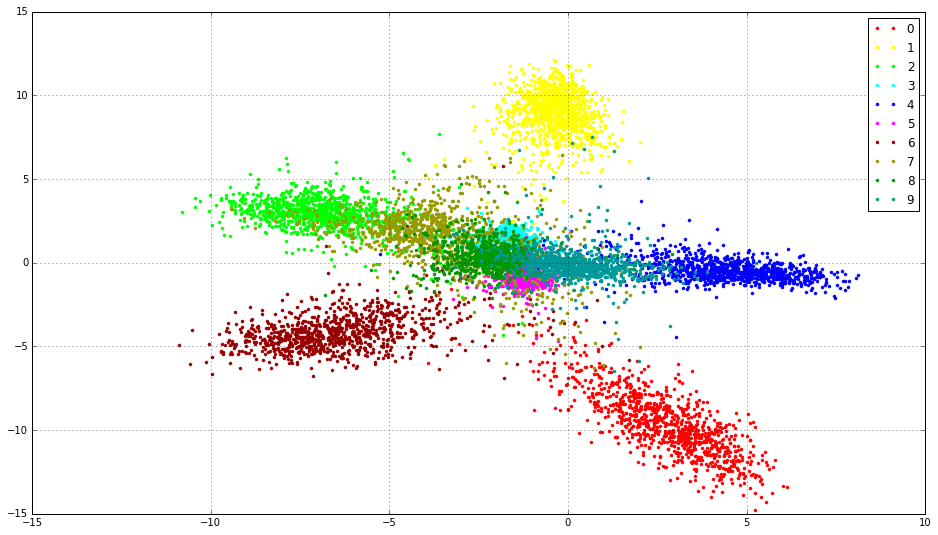

In [6]:
feat = out['feat']
f = plt.figure(figsize=(16,9))
c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', 
     '#ff00ff', '#990000', '#999900', '#009900', '#009999']
for i in range(10):
    plt.plot(feat[labels==i,0].flatten(), feat[labels==i,1].flatten(), '.', c=c[i])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.grid()
plt.show()

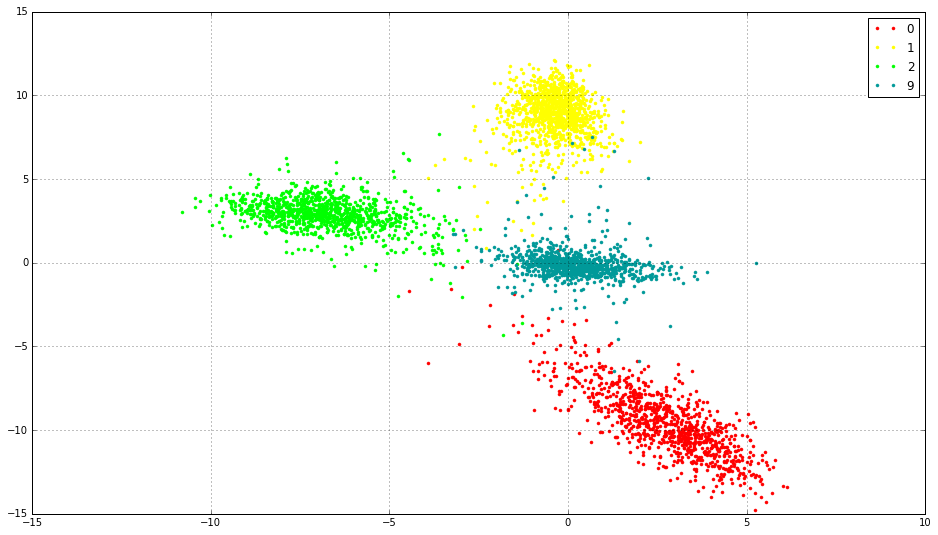

In [7]:
feat = out['feat']
f = plt.figure(figsize=(16,9))
c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', 
     '#ff00ff', '#990000', '#999900', '#009900', '#009999']
for i in [0,1,2,9]:
    plt.plot(feat[labels==i,0].flatten(), feat[labels==i,1].flatten(), '.', c=c[i])
plt.legend(['0', '1','2','9'])
plt.grid()
plt.show()

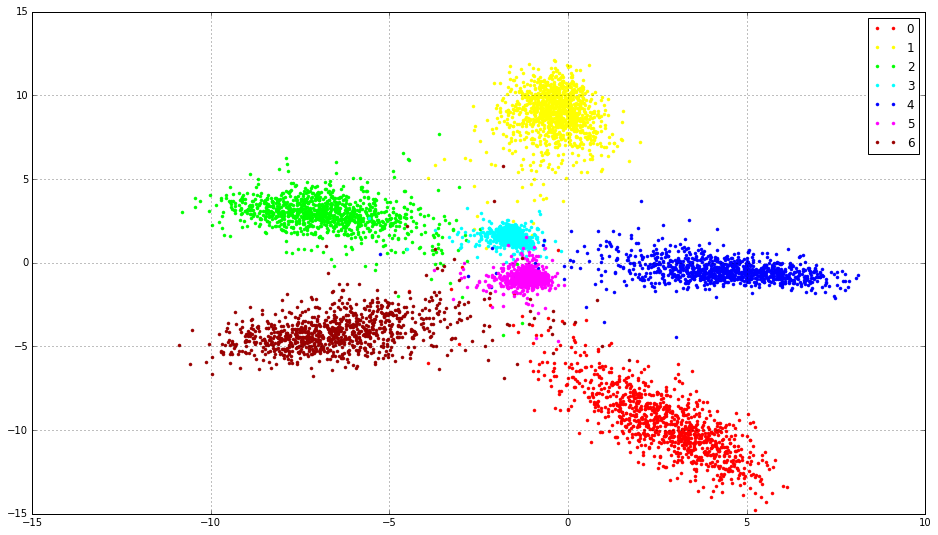

In [8]:
feat = out['feat']
f = plt.figure(figsize=(16,9))
c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', 
     '#ff00ff', '#990000', '#999900', '#009900', '#009999']
for i in range(7):
    plt.plot(feat[labels==i,0].flatten(), feat[labels==i,1].flatten(), '.', c=c[i])
plt.legend(['0', '1', '2', '3', '4', '5', '6'])
plt.grid()
plt.show()

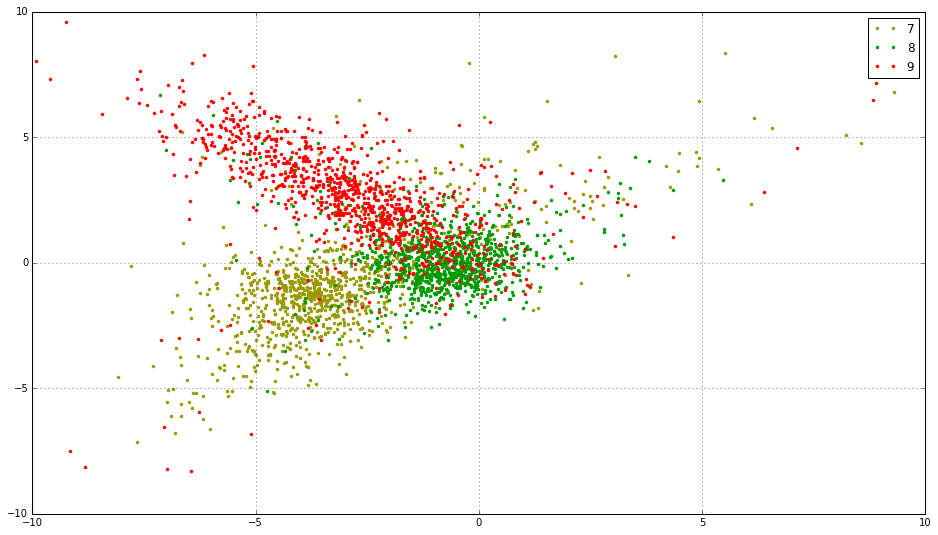

In [20]:
feat = out['feat']
f = plt.figure(figsize=(16,9))
c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', 
     '#ff00ff', '#990000', '#999900', '#009900', '#ff0000']
for i in [7,8,9]:
    plt.plot(feat[labels==i,0].flatten(), feat[labels==i,1].flatten(), '.', c=c[i])
plt.legend(['7', '8', '9'])
plt.grid()
plt.show()

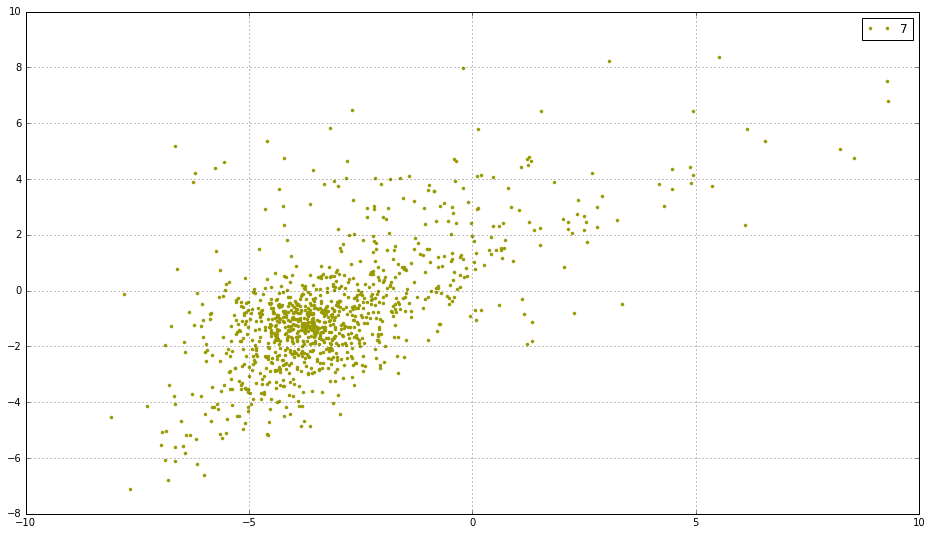

In [21]:
feat = out['feat']
f = plt.figure(figsize=(16,9))
c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', 
     '#ff00ff', '#990000', '#999900', '#009900', '#ff0000']
for i in [7]:
    plt.plot(feat[labels==i,0].flatten(), feat[labels==i,1].flatten(), '.', c=c[i])
plt.legend(['7'])
plt.grid()
plt.show()

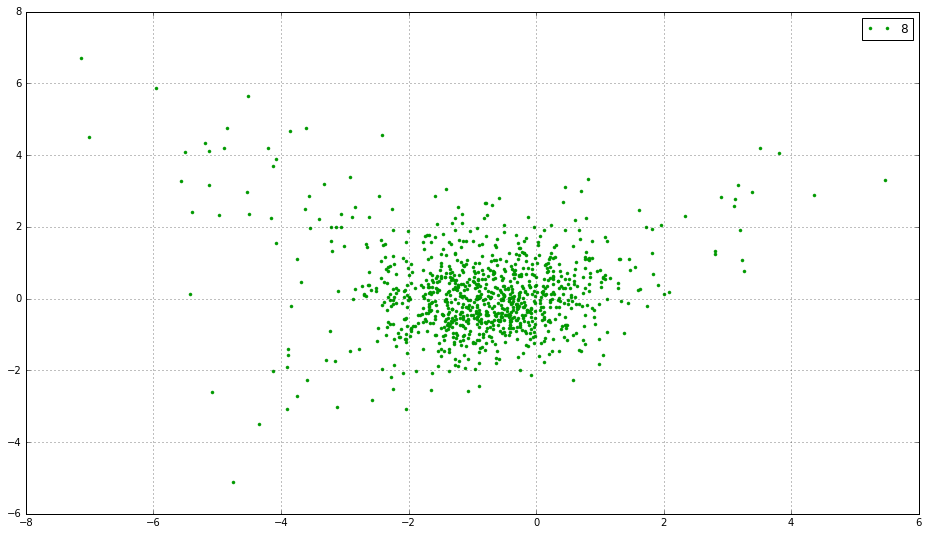

In [22]:
feat = out['feat']
f = plt.figure(figsize=(16,9))
c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', 
     '#ff00ff', '#990000', '#999900', '#009900', '#ff0000']
for i in [8]:
    plt.plot(feat[labels==i,0].flatten(), feat[labels==i,1].flatten(), '.', c=c[i])
plt.legend(['8'])
plt.grid()
plt.show()

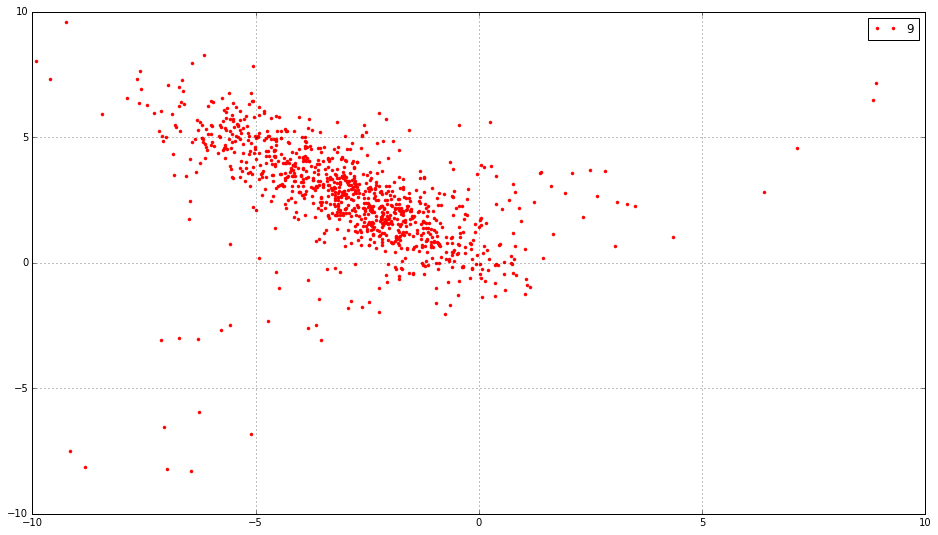

In [23]:
feat = out['feat']
f = plt.figure(figsize=(16,9))
c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', 
     '#ff00ff', '#990000', '#999900', '#009900', '#ff0000']
for i in [9]:
    plt.plot(feat[labels==i,0].flatten(), feat[labels==i,1].flatten(), '.', c=c[i])
plt.legend(['9'])
plt.grid()
plt.show()

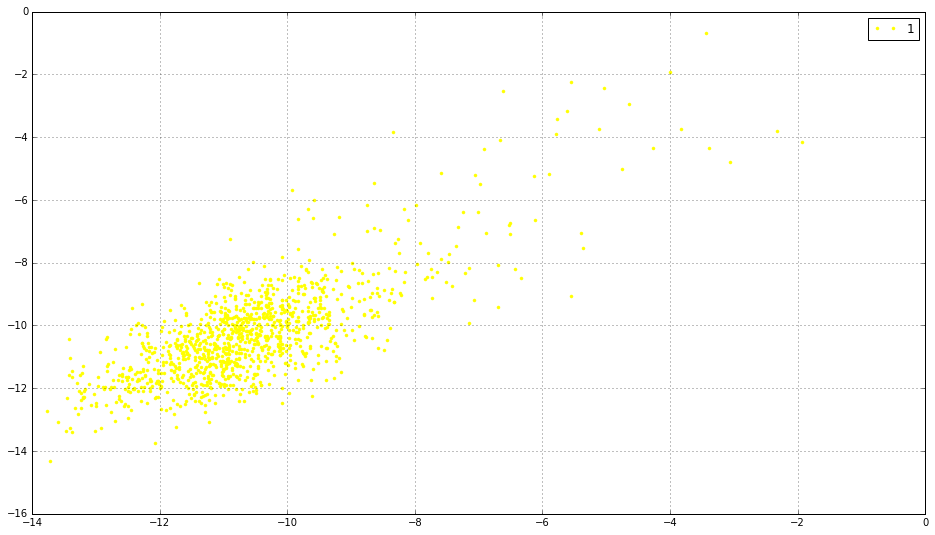

In [24]:
feat = out['feat']
f = plt.figure(figsize=(16,9))
c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', 
     '#ff00ff', '#990000', '#999900', '#009900', '#ff0000']
for i in [1]:
    plt.plot(feat[labels==i,0].flatten(), feat[labels==i,1].flatten(), '.', c=c[i])
plt.legend(['1'])
plt.grid()
plt.show()

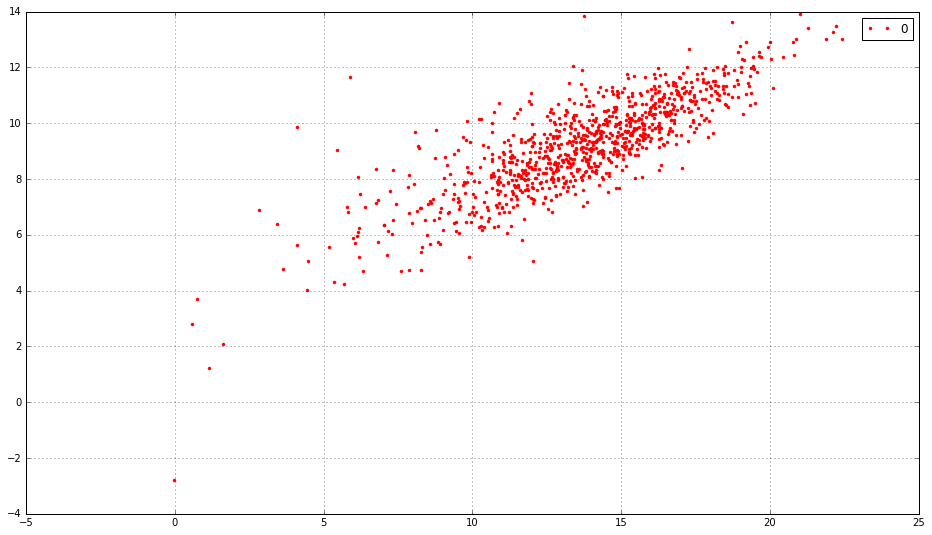

In [25]:
feat = out['feat']
f = plt.figure(figsize=(16,9))
c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', 
     '#ff00ff', '#990000', '#999900', '#009900', '#ff0000']
for i in [0]:
    plt.plot(feat[labels==i,0].flatten(), feat[labels==i,1].flatten(), '.', c=c[i])
plt.legend(['0'])
plt.grid()
plt.show()

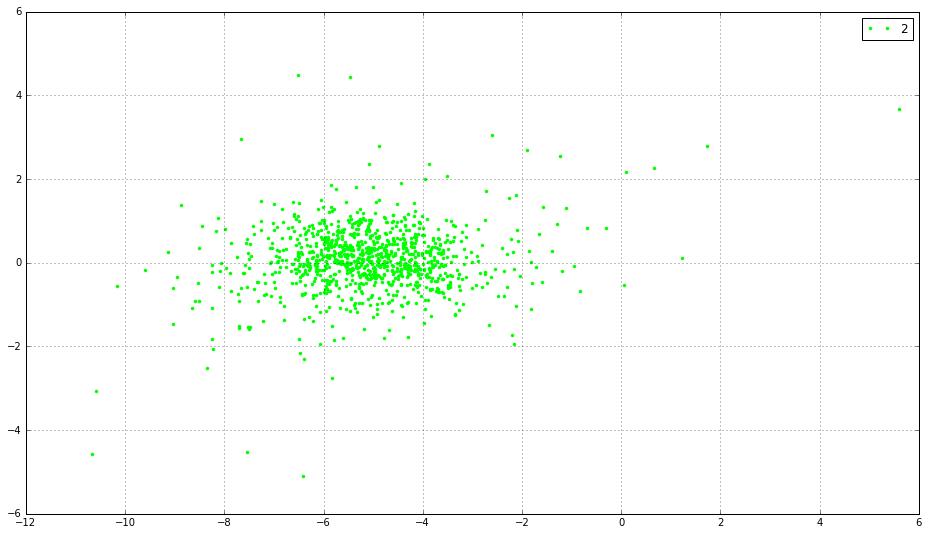

In [26]:
feat = out['feat']
f = plt.figure(figsize=(16,9))
c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', 
     '#ff00ff', '#990000', '#999900', '#009900', '#ff0000']
for i in [2]:
    plt.plot(feat[labels==i,0].flatten(), feat[labels==i,1].flatten(), '.', c=c[i])
plt.legend(['2'])
plt.grid()
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

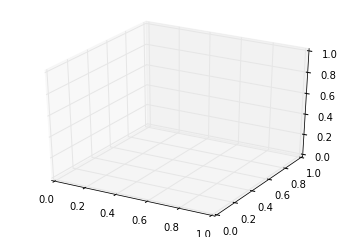

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
feat = out['feat']
f = plt.figure(figsize=(16,9))
c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', 
     '#ff00ff', '#990000', '#999900', '#009900', '#009999']
for i in [0,1,2]:
    ax.scatter(feat[labels==i,0].flatten(), feat[labels==i,1].flatten(), feat[labels==i,2].flatten(), zdir='z', s=20, c=c[i], depthshade=True)
    
plt.legend(['0', '1', '2'])
plt.grid()
plt.show()